In [1]:
from dataset import load_dataset
from clean import fill_nans, remove_outliers
from cluster import run_kmeans, run_dbscan
from visualize import show_kmeans, show_dbscan, compare_pca_umap

import numpy as np
import pandas as pd
from itertools import product
from tqdm.notebook import tqdm

# Dataset

In [2]:
df = load_dataset()
df = remove_outliers(df, iqr_ratio=5)
df = fill_nans(df, pd.DataFrame.median)
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.761500,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,2.5792,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,947.845,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,0.15508,0.39542,0.43992,0.88257,0.405605,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,2.5792,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,1.1509,1.3222,2304.600,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,3.90945,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,0.15508,0.28932,0.37282,0.88257,1.062700,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.700,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.961800,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,2.5792,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.000,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,1.0428,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.118400,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.600,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0


In [3]:
# compare_pca_umap(df)

# KMeans

In [4]:
run_kmeans(df, dict())

,silhouette,davies_bouldin,rand,purity,clusters
0,0.471714,0.689541,0.009018,0.531759,8.0


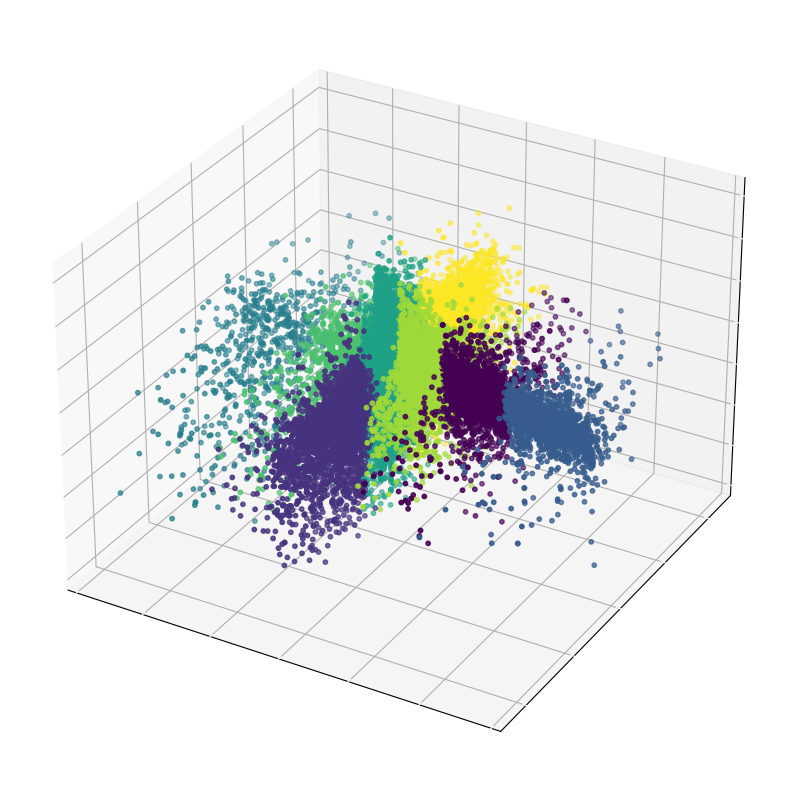

In [5]:
show_kmeans(df, dict())

In [ ]:
combined = pd.DataFrame()
for n_clusters, init, n_init, max_iter, tol in tqdm(product(
    [2, 4, 8, 16, 21, 42],
    ['k-means++', 'random'],
    [1, 3, 10],
    [100, 300, 500],
    [1e-5, 1e-4, 1e-3],
), total=6*2*3*3*3):
    if init == 'k-means++' and n_init > 1: continue
    res = run_kmeans(df, dict(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol))
    res['n_clusters'] = n_clusters
    res['init'] = init
    res['n_init'] = n_init
    res['max_iter'] = max_iter
    res['tol'] = tol
    combined = pd.concat([combined, res])
combined.sort_values(by=['rand', 'purity'], ascending=False).head(10)

  0%|          | 0/324 [00:00<?, ?it/s]

,silhouette,davies_bouldin,rand,purity,clusters,n_clusters,init,n_init,max_iter,tol
0,0.491444,0.673641,0.010824,0.532773,8.0,8,k-means++,10,500,0.001
0,0.491444,0.673641,0.010824,0.532773,8.0,8,k-means++,10,300,0.001
0,0.491444,0.673641,0.010824,0.532773,8.0,8,k-means++,10,100,0.001
0,0.491344,0.674861,0.010821,0.532934,8.0,8,k-means++,3,300,0.001
0,0.491344,0.674861,0.010821,0.532934,8.0,8,k-means++,3,100,0.001
...,...,...,...,...,...,...,...,...,...,...
0,0.647570,0.581064,-0.029826,0.874807,2.0,2,random,10,100,0.001
0,0.647570,0.581064,-0.029826,0.874807,2.0,2,k-means++,10,500,0.001
0,0.647453,0.581354,-0.029846,0.874646,2.0,2,random,3,100,0.001
0,0.647453,0.581354,-0.029846,0.874646,2.0,2,random,3,300,0.001


# DBSCAN

In [6]:
run_dbscan(df, dict())

,silhouette,davies_bouldin,rand,purity,clusters
0,0,0,0.0,1.0,1.0


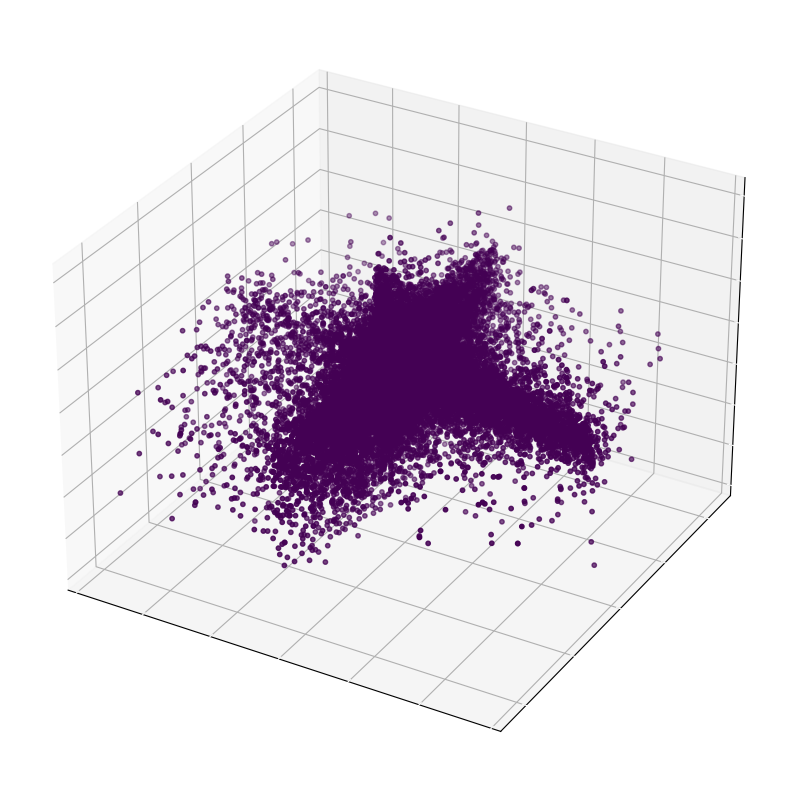

In [7]:
show_dbscan(df, dict())

In [ ]:
combined = pd.DataFrame()
for eps, min_samples, metric in tqdm(product(
    np.arange(0.1, 1.1, 0.1),
    [1, 3, 5, 10, 20, 35, 50],
    ['euclidean', 'manhattan', 'cosine', 'chebyshev'],
), total=10*7*4):
    res = run_dbscan(df, dict(eps=eps, min_samples=min_samples, metric=metric))
    res['eps'] = eps
    res['min_samples'] = min_samples
    res['metric'] = metric
    combined = pd.concat([combined, res])
combined.sort_values(by=['rand', 'purity'], ascending=False).head(10)

  0%|          | 0/280 [00:00<?, ?it/s]